In [1]:
import numpy as np

In [2]:
# Data points
p1 = (2, 10)
p2 = (2, 5)
p3 = (8, 4)
m1 = (5, 8)
m2 = (7, 5)
m3 = (6, 4)
n1 = (1, 2)
n2 = (4, 9)

In [3]:
X = np.array([p1, p2, p3, m1, m2, m3, n1, n2], 
             dtype=np.float32)
X

array([[ 2., 10.],
       [ 2.,  5.],
       [ 8.,  4.],
       [ 5.,  8.],
       [ 7.,  5.],
       [ 6.,  4.],
       [ 1.,  2.],
       [ 4.,  9.]], dtype=float32)

In [4]:
k = 3

c1 = p1
c2 = m1
c3 = n1

init_centroids = np.array([c1, c2, c3], 
                          dtype=np.float32)
init_centroids

array([[ 2., 10.],
       [ 5.,  8.],
       [ 1.,  2.]], dtype=float32)

In [5]:
centroids = init_centroids

In [6]:
squared_diffs = np.square(X[None, :, :] - init_centroids[:, None, :])
squared_diffs

array([[[ 0.,  0.],
        [ 0., 25.],
        [36., 36.],
        [ 9.,  4.],
        [25., 25.],
        [16., 36.],
        [ 1., 64.],
        [ 4.,  1.]],

       [[ 9.,  4.],
        [ 9.,  9.],
        [ 9., 16.],
        [ 0.,  0.],
        [ 4.,  9.],
        [ 1., 16.],
        [16., 36.],
        [ 1.,  1.]],

       [[ 1., 64.],
        [ 1.,  9.],
        [49.,  4.],
        [16., 36.],
        [36.,  9.],
        [25.,  4.],
        [ 0.,  0.],
        [ 9., 49.]]], dtype=float32)

In [7]:
euclidean_dists = np.sum(squared_diffs, axis=-1) ** 0.5
euclidean_dists

array([[0.       , 5.       , 8.485281 , 3.6055512, 7.071068 , 7.2111025,
        8.062258 , 2.236068 ],
       [3.6055512, 4.2426405, 5.       , 0.       , 3.6055512, 4.1231055,
        7.2111025, 1.4142135],
       [8.062258 , 3.1622777, 7.28011  , 7.2111025, 6.708204 , 5.3851647,
        0.       , 7.615773 ]], dtype=float32)

In [8]:
clusters = np.argmin(euclidean_dists, axis=0)
clusters

array([0, 2, 1, 1, 1, 1, 2, 1])

In [9]:
selector = np.arange(k)[:, None] == clusters[None, :]
selector

array([[ True, False, False, False, False, False, False, False],
       [False, False,  True,  True,  True,  True, False,  True],
       [False,  True, False, False, False, False,  True, False]])

In [10]:
means = np.zeros_like(centroids, dtype=np.float32)
for c in range(k):
    select = selector[c]
    points = X[select]
    mean_points = np.mean(points, axis=0)
    means[c] = mean_points
centroids = means
centroids

array([[ 2. , 10. ],
       [ 6. ,  6. ],
       [ 1.5,  3.5]], dtype=float32)

In [11]:
from matplotlib import pyplot as plt

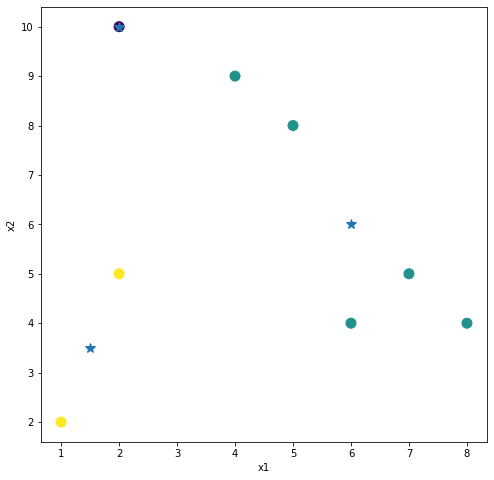

In [12]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], s=100, c=clusters)
plt.plot(centroids[:, 0], centroids[:, 1], '*', markersize=10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()